## Project For Customer Service Request Analysis

In [1]:
# Import important librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_file=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\91762\AppData\Local\Temp\ipykernel_19096\3994646259.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_file=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [3]:
customer_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [4]:
# Identifying the shape of data
customer_file.shape

(364558, 53)

## Identifying the number of null values in given data

In [5]:
customer_file.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [6]:
customer_file.shape

(364558, 53)

In [7]:
# find the percentage of missing values in each column

In [8]:
round(customer_file.isnull().sum()/len(customer_file.index),1)*100

Unique Key                          0.0
Created Date                        0.0
Closed Date                         0.0
Agency                              0.0
Agency Name                         0.0
Complaint Type                      0.0
Descriptor                          0.0
Location Type                       0.0
Incident Zip                        0.0
Incident Address                   10.0
Street Name                        10.0
Cross Street 1                     20.0
Cross Street 2                     20.0
Intersection Street 1              90.0
Intersection Street 2              90.0
Address Type                        0.0
City                                0.0
Landmark                          100.0
Facility Type                       0.0
Status                              0.0
Due Date                            0.0
Resolution Description              0.0
Resolution Action Updated Date      0.0
Community Board                     0.0
Borough                             0.0


In [9]:
## remove all columns having 50% missing values

In [10]:
missing_columns=customer_file.columns[100*(customer_file.isnull().sum()/len(customer_file.index)) > 50]

In [11]:
print(missing_columns)

Index(['Intersection Street 1', 'Intersection Street 2', 'Landmark',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name'],
      dtype='object')


In [12]:
customer_file=customer_file.drop(missing_columns,axis=1)

In [13]:
customer_file.shape

(364558, 39)

## Analyze the date column and remove the entries if it has an incorrect timeline

In [14]:
customer_file['Created Date']=pd.to_datetime(customer_file['Created Date'])
customer_file['Closed Date']=pd.to_datetime(customer_file['Closed Date'])

In [15]:
customer_file['Request_Closing_Time']= customer_file['Closed Date'].values-customer_file['Created Date'].values
customer_file['Request_Closing_Time_mins'] = customer_file['Request_Closing_Time']/np.timedelta64(1,'m')

In [16]:
# checking whether Created date column has any null values
customer_file['Created Date'].isnull().sum()

0

In [17]:
# checking whether Closed date column has any null values
customer_file['Closed Date'].isnull().sum()

2381

In [18]:
# closed date has some NULL values we have to remove them

In [19]:
customer_file.dropna(subset=['Closed Date'], inplace = True)

In [20]:
# Now it has no NULL values
customer_file['Closed Date'].isnull().sum()

0

## Frequency plot for city wise complaints

<AxesSubplot:title={'center':'Most common Complaints'}>

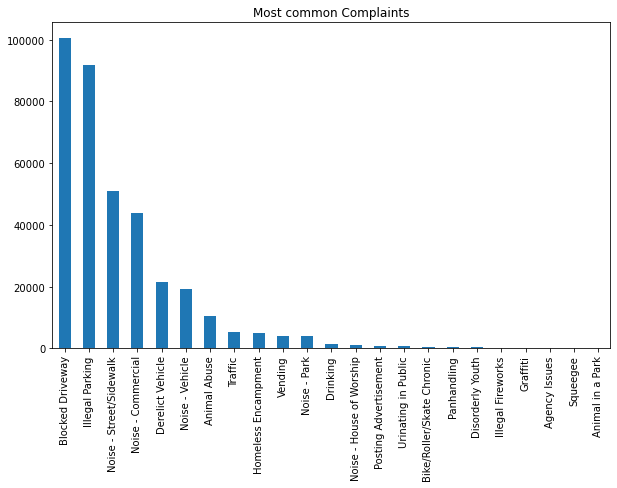

In [21]:
(customer_file['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints')

## Scatter plot and Hexbin plot for Brooklyn

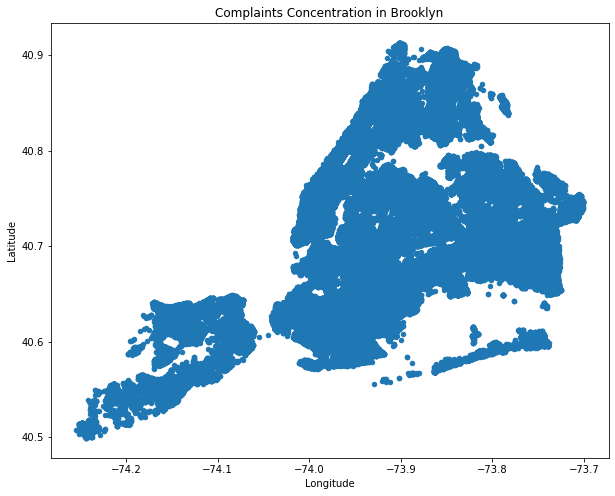

In [22]:
# Draw scatter plot for complaint concentration across Brooklyn
customer_file[['Longitude', 'Latitude']].plot(kind = 'scatter', x='Longitude', y='Latitude', title = 'Complaints Concentration in Brooklyn', figsize = (10, 8));

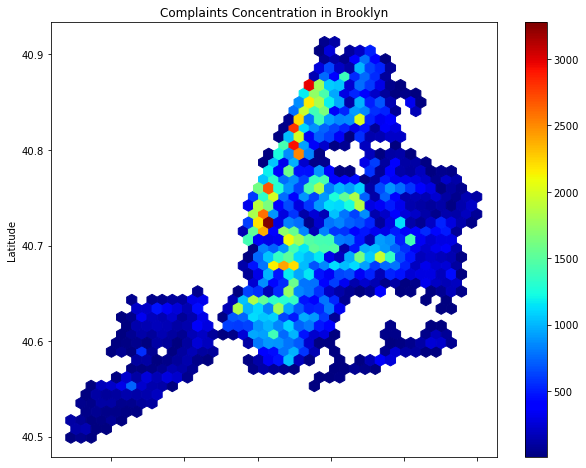

In [23]:
# Draw hexbin plot for complaint concentration across Brooklyn
customer_file[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet', mincnt=1, title = 'Complaints Concentration in Brooklyn', figsize = (10, 8));

## Find the major types of complaints

In [24]:
#Display complaint type and city together
customer_file[['Complaint Type','City']]

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
364553,Illegal Parking,WOODHAVEN
364554,Noise - Vehicle,BRONX
364555,Noise - Street/Sidewalk,NEW YORK
364556,Blocked Driveway,BRONX


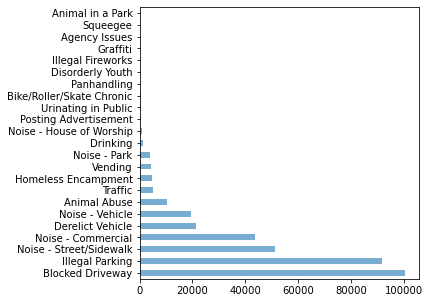

In [25]:
#Plot a bar graph of count vs. complaint types
customer_file['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(5,5))
plt.show()

In [26]:
#Find the top 10 complaint types 
Top_10_complaints=customer_file['Complaint Type'].value_counts().nlargest(10)
print(Top_10_complaints)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64


## Visualize the major types of complaints in each city

In [27]:
df1=customer_file.groupby(['City','Complaint Type']).size().unstack().fillna(0)

Text(0.5, 1.0, 'Number of complaints vs. City')

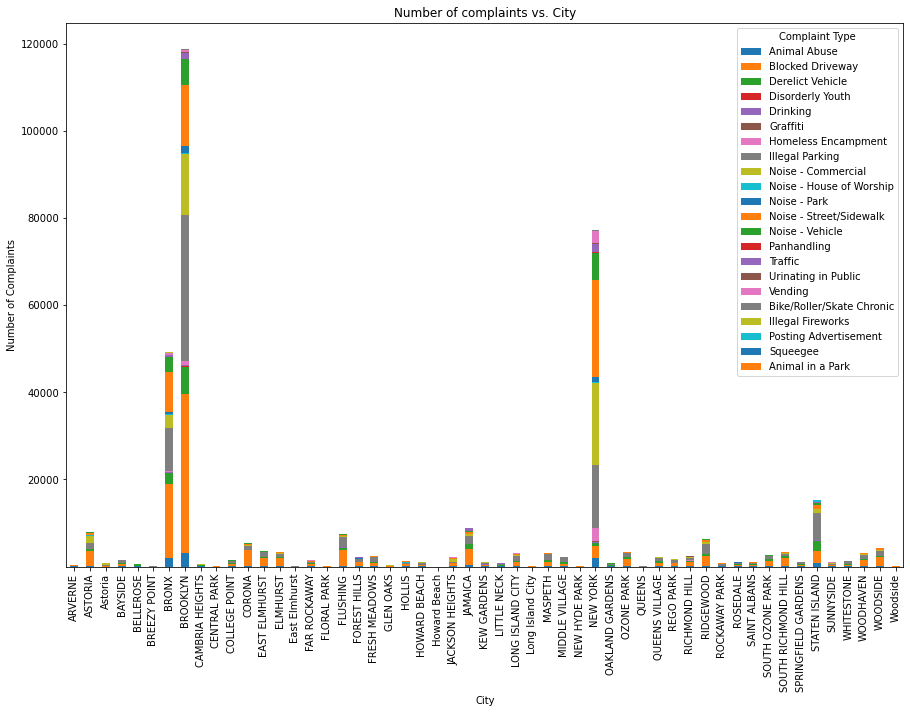

In [28]:
df1.plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('Number of complaints vs. City')

## Check if the average response time across various types of complaints

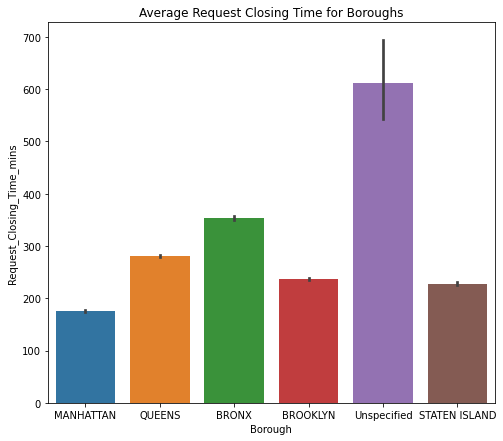

In [29]:
# Average resolving time of a complaint was observed for different Boroughs
plt.figure(figsize=(8,7))
sns.barplot(x='Borough', y='Request_Closing_Time_mins', data=customer_file)
plt.title('Average Request Closing Time for Boroughs')
plt.show()